In [1]:
from process_bigraph import Composite, types
from sed2 import pp
from sed2.schemas import sed_types, sed_compositions
from bigraph_viz import plot_bigraph, plot_flow

# add sed types to base types
types.type_registry.register_multiple(sed_types)

In [2]:
print(pp(sed_compositions))

{ 'estimate_and_run': { 'analysis': { '_ports': { 'inputs': { 'simulation_results': 'tree[any]'},
                                                  'outputs': { 'analysis_results': 'tree[any]'}},
                                      '_type': 'step'},
                        'analysis_results': 'tree[any]',
                        'data': 'tree[any]',
                        'model': 'sbml',
                        'parameter_estimation': { '_ports': { 'inputs': { 'data': 'tree[any]',
                                                                          'model': 'sbml'},
                                                              'outputs': { 'parameters': 'tree[any]'}},
                                                  '_type': 'step'},
                        'parameters': 'tree[any]',
                        'simulation_results': 'tree[any]',
                        'simulator': { '_ports': { 'inputs': { 'model': 'sbml',
                                                        

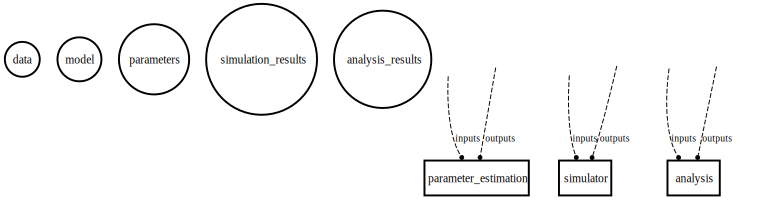

In [7]:
plot_bigraph(sed_compositions['estimate_and_run'])

In [3]:
simulation_state = {
    'data': {},
    'model': '"something.sbml"',
    'parameter_estimation': {
        'address': 'local:sed2.toy_processes.EstimateParameters',
        'config': {},
        'wires': {
            'inputs': {
                'data': ['data'],
                'model': ['model']},
            'outputs': {
                'parameters': ['parameters']
            }
        }
    },
    'simulator': {
        'address': 'local:sed2.toy_processes.UniformTimecourse',
        'config': {},
        'wires': {
            'inputs': {
                'model': ['model'],
                'parameters': ['parameters']},
            'outputs': {
                'simulation_results': ['simulation_results']
            }
        }
    },
    'analysis': {
        'address': 'local:sed2.toy_processes.AnalyzeResults',
        'config': {},
        'wires': {
            'inputs': {
                'simulation_results': ['simulation_results']
            },
            'outputs': {
                'analysis_results': ['analysis_results']
            }
        }
    }
}

In [10]:
# plot_bigraph(simulation_state)  #, sed_compositions['estimate_and_run'])

In [4]:
workflow = Composite({
    'composition': sed_compositions['estimate_and_run'],
    'schema': {
        'results': 'tree[any]'},
    'bridge': {
        'results': ['analysis_results']},
    'state': simulation_state
},
)

workflow.update({}, 0)   # TODO -- this is a step-only workflow, should not require interval

{'results': '{}'}